In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [1]:
import pandas as pd

In [3]:
!ls data

creditcard.csv


In [4]:
data = pd.read_csv('data/creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# vsss result form pcb to protect clients identity

In [7]:
# see balance

In [13]:
# Last column
y = data.iloc[:, -1]

# Columns from second to the last (excluding the last one)
X = data.iloc[:, 1:-1]

In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [19]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print("Training Features (X_train):")
#print(X_train)

### change the threshodl


train the model


after the model is trained, change the threshold

In [51]:
def f2_metric(y_true, y_pred):
    y_pred_bin = K.round(y_pred)  # Convert probabilities to binary predictions

    tp = K.sum(K.cast(y_true * y_pred_bin, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred_bin, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred_bin), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero
    recall = tp / (tp + fn + K.epsilon())

    beta = 2
    f2 = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall + K.epsilon())
    return f2

In [53]:
from tensorflow.keras import backend as K



# Build a simple neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output (fraud or not fraud)
])

# Compile the model with binary cross-entropy loss and custom metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f2_metric])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0219 - accuracy: 0.9989 - f2_metric: 0.0357 - val_loss: 0.0082 - val_accuracy: 0.9994 - val_f2_metric: 0.0421
Epoch 2/10
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0123 - accuracy: 0.9993 - f2_metric: 0.0389 - val_loss: 0.0050 - val_accuracy: 0.9994 - val_f2_metric: 0.0438
Epoch 3/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0059 - accuracy: 0.9993 - f2_metric: 0.0400 - val_loss: 0.0097 - val_accuracy: 0.9988 - val_f2_metric: 0.0174
Epoch 4/10
7121/7121 [==============================] - 11s 1ms/step - loss: 0.0045 - accuracy: 0.9993 - f2_metric: 0.0399 - val_loss: 0.0045 - val_accuracy: 0.9994 - val_f2_metric: 0.0421
Epoch 5/10
7121/7121 [==============================] - 11s 1ms/step - loss: 0.0043 - accuracy: 0.9993 - f2_metric: 0.0393 - val_loss: 0.0094 - val_accuracy: 0.9992 - val_f2_metric: 0.0314
Epoch 6/10
7121/7121 [==============================] - 

In [ ]:
veamos ahora las metrcias para diferentes thresholds

In [24]:


# Make predictions on test data
y_pred_probs = model.predict(X_test)  # Predicted probabilities

# Apply different thresholds for evaluation
thresholds = [0.1, 0.3, 0.4, 0.7, 0.9]  # Example threshold values
for threshold in thresholds:
    y_pred_bin = (y_pred_probs > threshold).astype(int)  # Convert to binary labels based on threshold
    
    # Evaluate metrics
    precision = precision_score(y_test, y_pred_bin)
    recall = recall_score(y_test, y_pred_bin)
    accuracy = accuracy_score(y_test, y_pred_bin)
    
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 30)

1781/1781 [==============================] - 1s 780us/step
Threshold: 0.1
Precision: 0.7810
Recall: 0.8367
Accuracy: 0.9993
------------------------------
Threshold: 0.3
Precision: 0.8298
Recall: 0.7959
Accuracy: 0.9994
------------------------------
Threshold: 0.4
Precision: 0.8478
Recall: 0.7959
Accuracy: 0.9994
------------------------------
Threshold: 0.7
Precision: 0.8824
Recall: 0.7653
Accuracy: 0.9994
------------------------------
Threshold: 0.9
Precision: 0.9194
Recall: 0.5816
Accuracy: 0.9992
------------------------------


1781/1781 [==============================] - 1s 777us/step


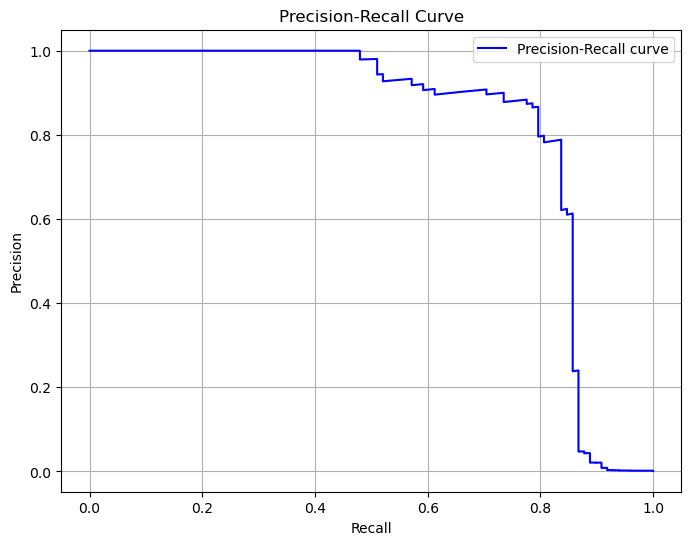

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Make predictions on test data (probabilities)
y_pred_probs = model.predict(X_test)

# Calculate precision and recall for all thresholds
precision, recall, thresholds_prc = precision_recall_curve(y_test, y_pred_probs)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [31]:
precision, recall, threshold

(array([0.00172045, 0.00172051, 0.00172054, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.06122449, 0.05102041,
        0.        ]),
 0.9)

In [33]:


# Define the thresholds for recall > 0.8 and precision > 0.5
recall_threshold = 0.8
precision_threshold = 0.5

# Filter the recall and precision values based on the conditions
indices = np.where((recall >= recall_threshold) & (precision >= precision_threshold))[0]

# Get the corresponding precision, recall, and thresholds for these conditions
precision_above_threshold = precision[indices]
recall_above_threshold = recall[indices]
thresholds_above_threshold = thresholds_prc[indices] if len(thresholds_prc) > len(indices) else 'N/A'

# Print the results
for r, p, t in zip(recall_above_threshold, precision_above_threshold, thresholds_above_threshold):
    print(f"Recall: {r:.2f}, Precision: {p:.2f}, Threshold: {t if t != 'N/A' else 'N/A'}")


Recall: 0.86, Precision: 0.50, Threshold: 0.02476321905851364
Recall: 0.86, Precision: 0.50, Threshold: 0.02696467749774456
Recall: 0.86, Precision: 0.51, Threshold: 0.027137016877532005
Recall: 0.86, Precision: 0.51, Threshold: 0.027413437142968178
Recall: 0.86, Precision: 0.51, Threshold: 0.02773837186396122
Recall: 0.86, Precision: 0.52, Threshold: 0.028103992342948914
Recall: 0.86, Precision: 0.52, Threshold: 0.028440380468964577
Recall: 0.86, Precision: 0.52, Threshold: 0.028470702469348907
Recall: 0.86, Precision: 0.53, Threshold: 0.028799831867218018
Recall: 0.86, Precision: 0.53, Threshold: 0.029229413717985153
Recall: 0.86, Precision: 0.53, Threshold: 0.029276637360453606
Recall: 0.86, Precision: 0.54, Threshold: 0.031670961529016495
Recall: 0.86, Precision: 0.54, Threshold: 0.032969310879707336
Recall: 0.86, Precision: 0.54, Threshold: 0.03347226604819298
Recall: 0.86, Precision: 0.55, Threshold: 0.03352546691894531
Recall: 0.86, Precision: 0.55, Threshold: 0.0343457646667957

Low Threshold: If your focus is on maximizing recall (catching as many fraudulent transactions as possible), choose a threshold close to 0. This will give you higher recall but lower precision.
Optimal Threshold: The optimal threshold can be determined by analyzing the precision-recall curve and selecting the threshold that gives you the best F2 score or recall while keeping precision at an acceptable level.

### changing the loss function

Adjust class weights to encourage the model to focus on fraud cases even more.

In [38]:
def weighted_binary_crossentropy(y_true, y_pred, weight_0=1.0, weight_1=10.0):
    y_true = tf.cast(y_true, tf.float32)  # Ensure y_true is float32
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)  # To avoid log(0)
    
    # Calculate standard binary crossentropy
    bce = - (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    
    # Apply class weights
    weighted_bce = weight_0 * (1 - y_true) * bce + weight_1 * y_true * bce
    
    return tf.reduce_mean(weighted_bce)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output (fraud or not fraud)
])

# Compile the model with the custom weighted binary crossentropy
model.compile(optimizer='adam',
              loss=lambda y_true, y_pred: weighted_binary_crossentropy(y_true, y_pred, weight_0=1.0, weight_1=10.0),
              metrics=['accuracy'])

In [39]:

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10


2025-02-03 19:01:21.650907: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52860040 exceeds 10% of free system memory.


7121/7121 [==============================] - 11s 1ms/step - loss: 0.0718 - accuracy: 0.9981 - val_loss: 0.0694 - val_accuracy: 0.9991
Epoch 2/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0436 - accuracy: 0.9989 - val_loss: 0.0416 - val_accuracy: 0.9992
Epoch 3/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0373 - accuracy: 0.9989 - val_loss: 0.0453 - val_accuracy: 0.9991
Epoch 4/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0341 - accuracy: 0.9986 - val_loss: 0.0404 - val_accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0285 - accuracy: 0.9989 - val_loss: 0.0370 - val_accuracy: 0.9992
Epoch 6/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0279 - accuracy: 0.9987 - val_loss: 0.0449 - val_accuracy: 0.9991
Epoch 7/10
7121/7121 [==============================] - 9s 1ms/step - loss: 0.0274 - accuracy: 0.9991 - val_loss: 0.0366 - val_accuracy: 0.99

In [40]:
# Make predictions on test data
y_pred_probs = model.predict(X_test)  # Predicted probabilities

# Apply different thresholds for evaluation
thresholds = [0.1, 0.3, 0.4, 0.7, 0.9]  # Example threshold values
for threshold in thresholds:
    y_pred_bin = (y_pred_probs > threshold).astype(int)  # Convert to binary labels based on threshold
    
    # Evaluate metrics
    precision = precision_score(y_test, y_pred_bin)
    recall = recall_score(y_test, y_pred_bin)
    accuracy = accuracy_score(y_test, y_pred_bin)
    
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 30)

1781/1781 [==============================] - 1s 800us/step
Threshold: 0.1
Precision: 0.4432
Recall: 0.8367
Accuracy: 0.9979
------------------------------
Threshold: 0.3
Precision: 0.6667
Recall: 0.8367
Accuracy: 0.9990
------------------------------
Threshold: 0.4
Precision: 0.7168
Recall: 0.8265
Accuracy: 0.9991
------------------------------
Threshold: 0.7
Precision: 0.8163
Recall: 0.8163
Accuracy: 0.9994
------------------------------
Threshold: 0.9
Precision: 0.8462
Recall: 0.7857
Accuracy: 0.9994
------------------------------


the previous as approach is the same as using class weights:

In [48]:




# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output (fraud or not fraud)
])

# Compile the model with the custom weighted binary crossentropy
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


class_weight = {0: 1., 1: 10.}  # Higher weight for the positive class


model.fit(X_train, y_train,  validation_data=(X_test, y_test), epochs=10, batch_size=32, class_weight=class_weight)

Epoch 1/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.1425 - accuracy: 0.9950 - val_loss: 0.0079 - val_accuracy: 0.9993
Epoch 2/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0514 - accuracy: 0.9978 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 3/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0355 - accuracy: 0.9982 - val_loss: 0.0123 - val_accuracy: 0.9991
Epoch 4/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0248 - accuracy: 0.9991 - val_loss: 0.0060 - val_accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0239 - accuracy: 0.9991 - val_loss: 0.0211 - val_accuracy: 0.9992
Epoch 6/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0198 - accuracy: 0.9993 - val_loss: 0.0085 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 10s 1ms/step - loss: 0.0203 - accuracy: 0.9993 - val_loss: 0.0053 - val_ac

In [49]:
# Make predictions on test data
y_pred_probs = model.predict(X_test)  # Predicted probabilities

# Apply different thresholds for evaluation
thresholds = [0.1, 0.3, 0.4, 0.7, 0.9]  # Example threshold values
for threshold in thresholds:
    y_pred_bin = (y_pred_probs > threshold).astype(int)  # Convert to binary labels based on threshold
    
    # Evaluate metrics
    precision = precision_score(y_test, y_pred_bin)
    recall = recall_score(y_test, y_pred_bin)
    accuracy = accuracy_score(y_test, y_pred_bin)
    
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 30)

1781/1781 [==============================] - 2s 828us/step
Threshold: 0.1
Precision: 0.6667
Recall: 0.8163
Accuracy: 0.9990
------------------------------
Threshold: 0.3
Precision: 0.7453
Recall: 0.8061
Accuracy: 0.9992
------------------------------
Threshold: 0.4
Precision: 0.7700
Recall: 0.7857
Accuracy: 0.9992
------------------------------
Threshold: 0.7
Precision: 0.8295
Recall: 0.7449
Accuracy: 0.9993
------------------------------
Threshold: 0.9
Precision: 0.8906
Recall: 0.5816
Accuracy: 0.9992
------------------------------


### Focal loss

Focal Loss is an extension of cross-entropy that helps focus more on hard-to-classify examples, typically improving recall without sacrificing precision too much, especially for imbalanced datasets.

In [44]:
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

In [45]:
# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output (fraud or not fraud)
])

# Compile the model with the custom weighted binary crossentropy
model.compile(optimizer='adam',
              loss=focal_loss(),
              metrics=['accuracy'])

In [46]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
7121/7121 [==============================] - 10s 1ms/step - loss: 6.6100e-07 - accuracy: 0.0022 - val_loss: 1.1299e-11 - val_accuracy: 0.0017
Epoch 2/10
7121/7121 [==============================] - 9s 1ms/step - loss: 8.1553e-11 - accuracy: 0.0017 - val_loss: 4.7179e-12 - val_accuracy: 0.0017
Epoch 3/10
7121/7121 [==============================] - 9s 1ms/step - loss: 3.1437e-11 - accuracy: 0.0017 - val_loss: 2.5651e-12 - val_accuracy: 0.0017
Epoch 4/10
7121/7121 [==============================] - 9s 1ms/step - loss: 1.7373e-11 - accuracy: 0.0017 - val_loss: 1.7069e-12 - val_accuracy: 0.0017
Epoch 5/10
7121/7121 [==============================] - 9s 1ms/step - loss: 1.1850e-11 - accuracy: 0.0017 - val_loss: 1.2832e-12 - val_accuracy: 0.0017
Epoch 6/10
7121/7121 [==============================] - 9s 1ms/step - loss: 8.9624e-12 - accuracy: 0.0017 - val_loss: 1.0302e-12 - val_accuracy: 0.0017
Epoch 7/10
7121/7121 [==============================] - 9s 1ms/step - loss: 7.1895e-12 

In [47]:
# Make predictions on test data
y_pred_probs = model.predict(X_test)  # Predicted probabilities

# Apply different thresholds for evaluation
thresholds = [0.1, 0.3, 0.4, 0.7, 0.9]  # Example threshold values
for threshold in thresholds:
    y_pred_bin = (y_pred_probs > threshold).astype(int)  # Convert to binary labels based on threshold
    
    # Evaluate metrics
    precision = precision_score(y_test, y_pred_bin)
    recall = recall_score(y_test, y_pred_bin)
    accuracy = accuracy_score(y_test, y_pred_bin)
    
    print(f"Threshold: {threshold}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("-" * 30)

1781/1781 [==============================] - 2s 807us/step
Threshold: 0.1
Precision: 0.0017
Recall: 1.0000
Accuracy: 0.0017
------------------------------
Threshold: 0.3
Precision: 0.0017
Recall: 1.0000
Accuracy: 0.0017
------------------------------
Threshold: 0.4
Precision: 0.0017
Recall: 1.0000
Accuracy: 0.0017
------------------------------
Threshold: 0.7
Precision: 0.0017
Recall: 1.0000
Accuracy: 0.0017
------------------------------
Threshold: 0.9
Precision: 0.0017
Recall: 1.0000
Accuracy: 0.0018
------------------------------


In [50]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{0: 56864, 1: 98}


Your dataset is highly imbalanced (98 fraud cases vs. 56,864 normal transactions), which explains why focal loss was overcompensating for the minority class and predicting almost everything as fraud.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import fbeta_score, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight

# Define F2-score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

# Function to create a simple neural network
def create_model(hidden_units=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter variations
configs = [
    {'hidden_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001},
    {'hidden_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.0005},
    {'hidden_units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.0003},
]

best_model = None
best_f2 = 0

# Train and evaluate models
for config in configs:
    print(f"Training model with {config}")
    
    model = create_model(**config)
    
    # Compute class weights
    class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
    class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
    
    model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weight_dict, verbose=1)
    
    # Get predictions
    y_pred_probs = model.predict(X_val)  # Validation set
    y_pred_bin = (y_pred_probs > 0.5).astype(int)  # Default threshold = 0.5
    
    # Compute F2-score
    f2 = f2_score(y_val, y_pred_bin)
    print(f"Model F2-score: {f2:.4f}")
    
    # Save best model
    if f2 > best_f2:
        best_f2 = f2
        best_model = model

print(f"\nBest model F2-score: {best_f2:.4f}")
